In [1]:
%pylab inline
import mlpy
import mlpy.wavelet as wave
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.html import widgets
from IPython.display import display

mlpy.__version__

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


'3.5.0'

In [2]:
def norm(x):
    """
    Normalize array x to range [0,1].
    """
    return (x-min(x)) / (max(x)-min(x))

####<h2>Load data</h2>

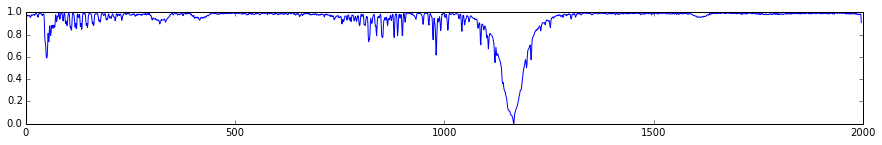

In [3]:
filename = 'qd080025.asc'

s = np.genfromtxt(filename, delimiter='  ')
s = s[:,1]
s = norm(s)
#s *= 1/s.max()
plt.figure(figsize=(15,2))
plt.plot(s)

####CWT

scales: 48


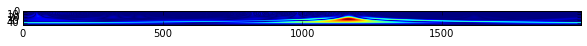

In [4]:
scales = wave.autoscales(N=s.shape[0], dt=1, dj=0.25, wf='dog', p=2)
print 'scales:', len(scales)
X = wave.cwt(s, dt=1, scales=scales, wf='dog', p=2)

plt.figure(figsize=(10,10))
plt.imshow(np.abs(X))

####Remove frequencies, reconstruction

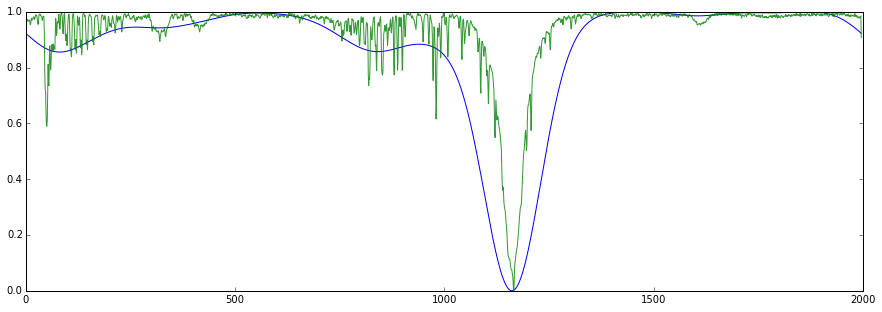

In [5]:
def removeFreqs(freqMax):
    """
    Removes frequencies interval [0, freqMax].
    """
    Xz = np.concatenate((np.zeros((freqMax,len(s))), X[freqMax:]))
    #print Xz.shape
    rec = wave.icwt(Xz, dt=1, scales=scales, wf='dog', p=2)
    rec = norm(rec)
    
    plt.figure(figsize=(15,5))
    #plt.plot(s-rec)
    plt.plot(rec)
    plt.plot(s, alpha=0.8)

slider = widgets.IntSlider(min=0, max=len(scales), step=1, value=20)
w = widgets.interactive(removeFreqs, freqMax=slider)
display(w)

In [6]:
freq0=1
winslider = widgets.IntSlider (min=0, max=len(scales)-freq0, step=1)   
slider = widgets.IntSlider(min=0, max=len(scales)-windowSize, step=1, value=1)

NameError: name 'windowSize' is not defined

In [ ]:
def removeFreqWindow(freq0, windowSize):
    """
    Removes frequencies interval [freq0, freq0 + windowSize].×
freq0
0
windowSize
18
￼
    """
    
    Xz = np.concatenate((X[:freq0], np.zeros((windowSize,len(s))), X[freq0+windowSize:]))
    rec = wave.icwt(Xz, dt=1, scales=scales, wf='dog', p=2)
    rec = norm(rec)
    if slider.value + winslider.value > scales:
       slider.value = scales-winslider.value
       winslider.value=scales
    
    
    plt.figure(figsize=(15,5))
    #plt.plot(s - rec)
    plt.plot(rec)
    plt.plot(s, alpha=0.8)
    

#ws = widgets.interactive(windowChange, freq0=slider,windowSize=winslider)
w = widgets.interactive(removeFreqWindow, freq0=slider, windowSize=winslider)
display(w)